## Color recognition from scratch

In [24]:
# -*- coding: utf-8 -*-
"""
Created on Sun Apr 21 15:48:22 2019

@author: jaide
"""

import pandas as pd
import numpy as np
import tkinter as tk
from tkinter.filedialog import askdirectory
import os
import cv2
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

"""Function to import training data set. When run, point to the parent folder containing all subfolders for each class."""
def import_data():
    
    root = tk.Tk()
    #arr = np.empty((0,100,100,3), int)
    arr=[]
    y=[]
    name = askdirectory(title = "../data/color_clean/")
    root.update()
    root.withdraw()
    print(name)
    sub_folders=os.listdir(name)
    for folder in sub_folders:
        print("Currently reading:",name+"/"+folder)
        print("Total files to be read in this folder:",len(os.listdir(name+"/"+folder)))
        files=os.listdir(name+"/"+folder)
        
        for f in files:
            image = cv2.imread(name+"/"+folder+"/"+f)
            #uncomment the line below to test a different color space
            #image = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
            image = np.array(image, dtype=np.uint8)
            dim = (100,100)
            y.append(folder)
            # perform the actual resizing of the image and show it
            resized = cv2.resize(image, dim, interpolation = cv2.INTER_AREA)
            arr.append(resized)
            #print(f,y[len(y)-1])
    
    return (np.asarray(arr),np.asarray(y))
    



In [25]:
df,y=import_data()

C:/Users/puthu/siva/EPITA/S3/neural_network_and_deep_learning/Vehicle-Color-Identification/data/color_clean
Currently reading: C:/Users/puthu/siva/EPITA/S3/neural_network_and_deep_learning/Vehicle-Color-Identification/data/color_clean/black
Total files to be read in this folder: 3442
Currently reading: C:/Users/puthu/siva/EPITA/S3/neural_network_and_deep_learning/Vehicle-Color-Identification/data/color_clean/blue
Total files to be read in this folder: 1086
Currently reading: C:/Users/puthu/siva/EPITA/S3/neural_network_and_deep_learning/Vehicle-Color-Identification/data/color_clean/cyan
Total files to be read in this folder: 281
Currently reading: C:/Users/puthu/siva/EPITA/S3/neural_network_and_deep_learning/Vehicle-Color-Identification/data/color_clean/gray
Total files to be read in this folder: 3046
Currently reading: C:/Users/puthu/siva/EPITA/S3/neural_network_and_deep_learning/Vehicle-Color-Identification/data/color_clean/green
Total files to be read in this folder: 482
Currently re

In [26]:
d={'black':0,'blue':1,'cyan':2,'gray':3,'green':4,'red':5,'white':6,'yellow':7}
d_b={0: 'black',1:'blue',2:'cyan',3:'gray',4:'green',5:'red',6:'white',7:'yellow'}

labels=np.unique(y)
y=pd.Series(y).map(d)

0 784
1 4154
2 4680
3 5073
4 7920
5 9329
6 12244
7 14156


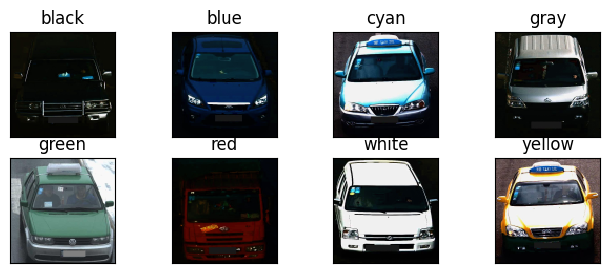

In [27]:
"""Print a random image per class"""
import matplotlib.pyplot as plt
import random
%matplotlib inline
fig = plt.figure(figsize=(8,3))
for i in range(8):
    
    ax = fig.add_subplot(2, 4, 1 + i, xticks=[], yticks=[])
    idx = random.choice(y[y==i].index)
    print(i,idx)
    features_idx = df[idx,::]
    #img_num = np.random.randint(features_idx.shape[0])
    #im = np.transpose(features_idx[img_num,::],(1,2,0))
    im = features_idx
    ax.set_title(d_b[i])
    plt.imshow(im[:,:,[2,1,0]],interpolation='nearest')
plt.show()

In [28]:
df=df.astype('float32')

In [29]:
"""Normalization of data. Note: a different normalization value will be required if using a color space apart from RGB"""
df=df/255

In [30]:
"""Train-test split"""
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.33, random_state=42)

y_train=to_categorical(y_train)
y_test=to_categorical(y_test)


In [31]:
"""create validation data of size 1000"""
X_val=X_train[:1000]
partial_X_train=X_train[1000:]
y_val=y_train[:1000]
partial_y_train=y_train[1000:]


In [32]:
from keras import models
from keras import layers
from keras import optimizers

#del network
from keras import backend as K

# Some memory clean-up
K.clear_session()


In [33]:
"""for description on Model architecture refer to project report"""
network = models.Sequential()
network.add(layers.Conv2D(32, kernel_size=(3,3),padding="same",input_shape=(100,100,3),activation="relu"))
network.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
network.add(layers.Conv2D(10, kernel_size=(2,2), activation='relu'))
network.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
network.add(layers.Flatten())
network.add(layers.Dense(128, activation='relu'))
network.add(layers.Dense(64, activation='relu'))

network.add(layers.Dense(8, activation='softmax'))


c:\Users\puthu\anaconda3\envs\fva\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [34]:
"""Compile using either RMSprop of SGD with momentum 0.9 (similar outputs)"""
network.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(),#SGD(momentum=0.9),
              metrics=['accuracy'])


In [35]:
"""Run for 30 epochs"""
history=network.fit(partial_X_train, partial_y_train, epochs=30,validation_data=(X_val,y_val))


Epoch 1/30
271/271 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step - accuracy: 0.6120 - loss: 1.0483 - val_accuracy: 0.6770 - val_loss: 0.8184
Epoch 2/30
271/271 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step - accuracy: 0.8412 - loss: 0.4300 - val_accuracy: 0.8300 - val_loss: 0.4874
Epoch 3/30
271/271 ━━━━━━━━━━━━━━━━━━━━ 7s 24ms/step - accuracy: 0.8911 - loss: 0.2919 - val_accuracy: 0.7320 - val_loss: 0.7809
Epoch 4/30
271/271 ━━━━━━━━━━━━━━━━━━━━ 11s 39ms/step - accuracy: 0.9236 - loss: 0.2123 - val_accuracy: 0.7380 - val_loss: 0.7561
Epoch 5/30
271/271 ━━━━━━━━━━━━━━━━━━━━ 16s 60ms/step - accuracy: 0.9413 - loss: 0.1579 - val_accuracy: 0.9020 - val_loss: 0.3001
Epoch 6/30
271/271 ━━━━━━━━━━━━━━━━━━━━ 20s 57ms/step - accuracy: 0.9627 - loss: 0.0999 - val_accuracy: 0.8820 - val_loss: 0.3623
Epoch 7/30
271/271 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - accuracy: 0.9731 - loss: 0.0744 - val_accuracy: 0.9110 - val_loss: 0.3362
Epoch 8/30
271/271 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - accuracy: 0.9777 - loss: 0.0608 - val_a

In [36]:
"""check performance on test data """
test_loss, test_acc = network.evaluate(X_test, y_test)
print(test_loss, test_acc)
#hazy images
#5149/5149 [==============================] - 2s 422us/step
#0.916966989037365 0.8657991842266008
#haze free images
#4752/4752 [==============================] - 2s 358us/step
#0.7896632951005599 0.9126683501683501

149/149 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9141 - loss: 0.9947
1.0827337503433228 0.9048821330070496


dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


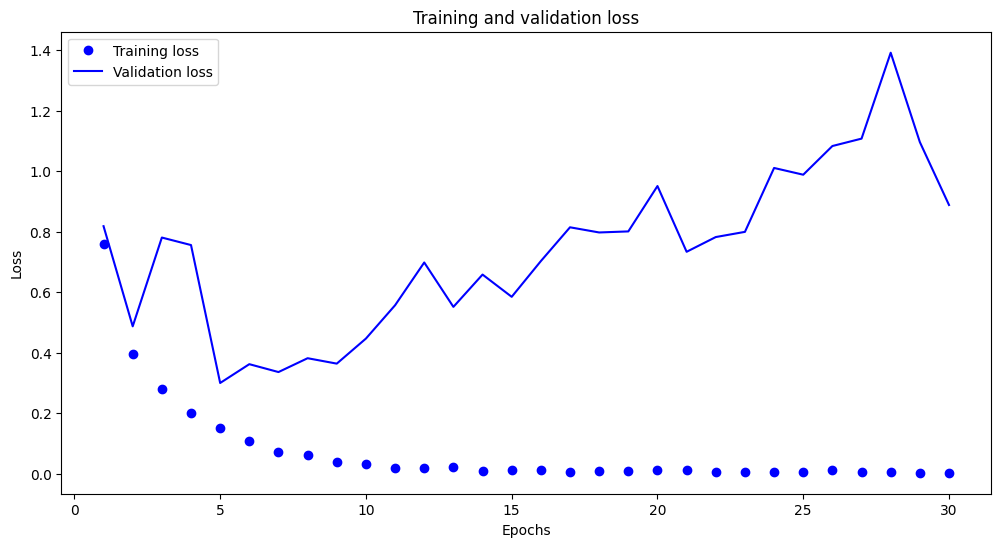

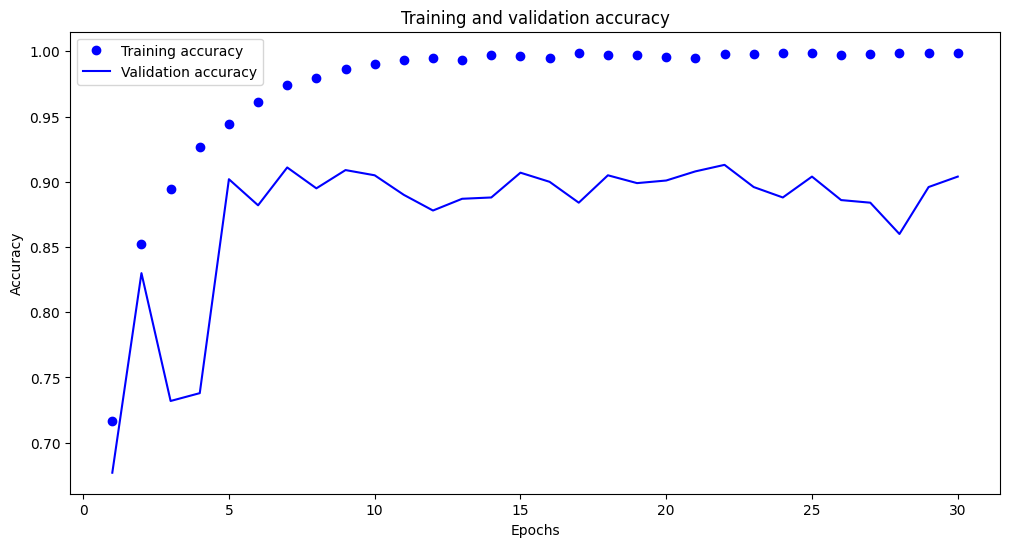

In [37]:
import matplotlib.pyplot as plt
%matplotlib inline

# Check available keys in the history object
print(history.history.keys())

# Assuming the keys might be different, update the code to match the correct keys
acc = history.history.get('accuracy', history.history.get('acc'))
val_acc = history.history.get('val_accuracy', history.history.get('val_acc'))
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

# Plotting the loss
plt.figure(figsize=(12, 6))
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plotting accuracy if available
if acc is not None and val_acc is not None:
    plt.figure(figsize=(12, 6))
    plt.plot(epochs, acc, 'bo', label='Training accuracy')
    plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()
else:
    print("Accuracy metrics are not available in the history object.")



In [38]:
"""re-train optimal model on entire training data """
K.clear_session()
network = models.Sequential()
network.add(layers.Conv2D(32, kernel_size=(3,3),padding="same",input_shape=(100,100,3),activation="relu"))
network.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
network.add(layers.Conv2D(10, kernel_size=(2,2), activation='relu'))
network.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
network.add(layers.Flatten())
network.add(layers.Dense(128, activation='relu'))
network.add(layers.Dense(64, activation='relu'))

network.add(layers.Dense(8, activation='softmax'))


network.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(),#SGD(momentum=0.9),
              metrics=['accuracy'])

history=network.fit(X_train, y_train, epochs=7)


c:\Users\puthu\anaconda3\envs\fva\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/7
302/302 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step - accuracy: 0.6310 - loss: 1.0206
Epoch 2/7
302/302 ━━━━━━━━━━━━━━━━━━━━ 7s 24ms/step - accuracy: 0.8490 - loss: 0.4054
Epoch 3/7
302/302 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 0.8926 - loss: 0.2936
Epoch 4/7
302/302 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 0.9217 - loss: 0.2184
Epoch 5/7
302/302 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 0.9407 - loss: 0.1663
Epoch 6/7
302/302 ━━━━━━━━━━━━━━━━━━━━ 7s 24ms/step - accuracy: 0.9521 - loss: 0.1283
Epoch 7/7
302/302 ━━━━━━━━━━━━━━━━━━━━ 7s 24ms/step - accuracy: 0.9636 - loss: 0.0951


In [39]:
"""evaluate optimal model on test data"""
test_loss, test_acc = network.evaluate(X_test, y_test)
print(test_loss, test_acc)
#hazy
#5149/5149 [==============================] - 3s 596us/step
#0.36521502827458946 0.8813361817018387
#haze free
#4752/4752 [==============================] - 2s 499us/step
#0.31179774408338445 0.906986531986532

149/149 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9146 - loss: 0.3107
0.32831329107284546 0.9082491397857666


In [40]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Convert one-hot encoded y_test to class indices
Y_test = np.argmax(y_test, axis=1)

# Predict class probabilities
y_pred_prob = network.predict(X_test)

# Convert probabilities to class indices
y_pred = np.argmax(y_pred_prob, axis=1)

# Print classification report
print(classification_report(Y_test, y_pred, target_names=list(d.keys())))


149/149 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
              precision    recall  f1-score   support

       black       0.92      0.97      0.94      1150
        blue       0.94      0.91      0.92       381
        cyan       0.94      0.97      0.95        91
        gray       0.83      0.80      0.82       984
       green       0.98      0.99      0.99       181
         red       0.96      0.96      0.96       341
       white       0.91      0.90      0.90      1426
      yellow       0.98      0.94      0.96       198

    accuracy                           0.91      4752
   macro avg       0.93      0.93      0.93      4752
weighted avg       0.91      0.91      0.91      4752



In [41]:
"""Optimal network summary"""
network.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 100, 100, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 50, 50, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 49, 49, 10)     │         1,290 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 24, 24, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 5760)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       737,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 8)              │           520 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,496,742 (5.71 MB)

 Trainable params: 748,370 (2.85 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 748,372 (2.85 MB)

In [42]:
"""Accuracy per class"""
test_acc=[]
for i in range(8):
    chk=np.array([np.argmax(y, axis=None, out=None)==i for y in y_test])
    test_acc.append(network.evaluate(X_test[chk,::],y_test[chk],verbose=0)[1])
    print(labels[i]," :: ",round(test_acc[i],2))
print(sum(test_acc)/len(test_acc))

black  ::  0.97
blue  ::  0.91
cyan  ::  0.97
gray  ::  0.8
green  ::  0.99
red  ::  0.96
white  ::  0.9
yellow  ::  0.94
0.9309216439723969


In [43]:
"""Save model and weights"""
network.save('../model/fva_vehicle_color_model.h5')
network.save_weights('../model/fva_vehicle_color_model.weights.h5')


In [44]:
# Predicting the class for a single test instance
prediction = network.predict(X_test[5,::].reshape(1, 100, 100, 3)) # Returns the predicted class probabilities

# Assuming `d_b` is a list of class labels
print("class:", d_b[np.argmax(prediction)])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
class: white


In [45]:
print(y_test[5])

[0. 0. 0. 0. 0. 0. 1. 0.]


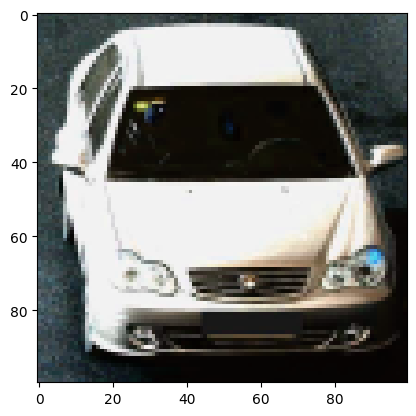

In [46]:
plt.imshow(X_test[5,::])